In [251]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

#plot styles

COLOR = 'white'
plt.style.use('dark_background')
plt.rcParams['text.color'] = COLOR
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('./2014-2021-PIT-esimates-cleanish.csv', low_memory=False).drop(columns=['Unnamed: 0'])


In [4]:
data.head()
data.columns
data['year']

,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,491.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al


Index(['CoC Number', 'CoC Name', 'Overall Homeless',
       'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Sheltered ES Homeless',
       'Sheltered ES Homeless - Under 18',
       'Sheltered ES Homeless - Age 18 to 24',
       'Sheltered ES Homeless - Over 24',
       ...
       'Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino',
       'Unsheltered Homeless Parenting Youth (Under 25) - White',
       'Unsheltered Homeless Parenting Youth (Under 25) - Black or African American',
       'Unsheltered Homeless Parenting Youth (Under 25) - Asian',
       'Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native',
       'Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander',
       'Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races',
       'CoC Category', 'City', 'State'],
      dtype='object', length=545)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2738    2020
2739    2020
2740    2020
2741    2020
2742    2020
Name: year, Length: 2743, dtype: int64

In [5]:
data.groupby(['City', 'State','year'])[['Overall Homeless']].sum()

Overall Homeless
City      State year                  
aberdeen  md    2014             223.0
                2015             210.0
                2016             179.0
                2017             189.0
                2018             190.0
...                                ...
ypsilanti mi    2016             342.0
                2017             302.0
                2018             282.0
                2019             273.0
                2020             274.0

[2566 rows x 1 columns]

## Case study of groups 1 and 2 in Andrew's kmeans clusters
- group 1: Atlanta, Houston, Madison 
- (Andrew's notebook had Baltimore, Indianapolis in group 1 but when I reran the code I got the cities above)
- group 2: Austin, Jacksonville (Wasn't clear if Andrew's EDA was referring to Jacsonville, IL or Jacksonville, FL so doing the analysis for both)

Text(0.5, 1.0, 'Atlanta, GA')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'Houston, TX')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'Madison, WI')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'Austin, TX')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'Jacksonville, FL')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'Jacksonville, IL')

Text(0, 0.5, '# homeless')

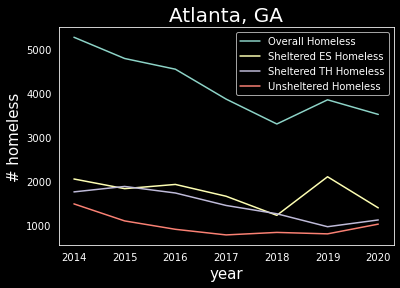

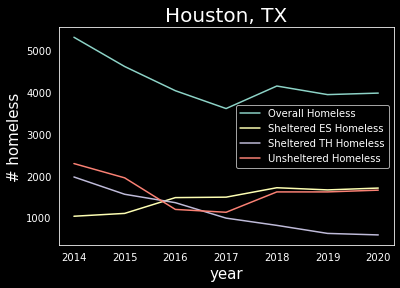

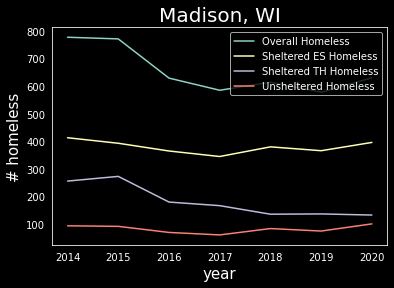

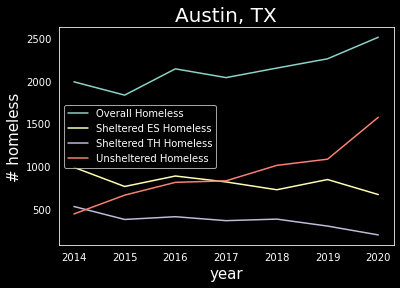

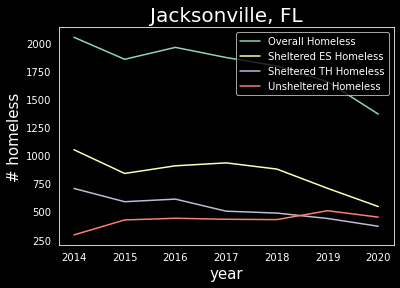

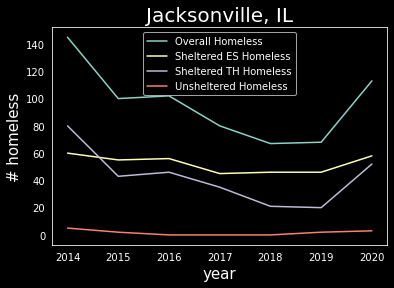

In [255]:
#change in homeless numbers between 2014 and 2020

cities = [('atlanta', 'ga'), ('houston', 'tx'), ('madison', 'wi'), ('austin', 'tx'), ('jacksonville', 'fl'), ('jacksonville', 'il')];
fig, axes = plt.subplots(len(cities),1,figsize = (8,25));
plt.close()
for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]
    axes[i] = city_data.groupby('year').sum().plot()
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylabel('# homeless')
    axes[i].set_facecolor('black');

## A different question:

- Which cities saw the highest increases/decreases in homeless numbers?

In [99]:

df = data.groupby(['City','State','year']).sum().reset_index()

#make a dataframe with change in homeless numbers for each city between 2014 -2021
start_year = 2014
end_year = 2020


df_start_year = df[df['year'] == start_year].drop(columns = ['year']).set_index(['City','State'])
df_end_year = df[df['year'] == end_year].drop(columns = ['year']).set_index(['City','State'])

# dropping cities for which we don't have data for both start_year and end_year

#df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless')
df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless').head(10)
df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless').tail(10)




,,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered TH Homeless,Sheltered TH Homeless - Under 18,...,Unsheltered Homeless Parenting Youth (Under 25) - Transgender,Unsheltered Homeless Parenting Youth (Under 25) - Gender Non-Conforming,Unsheltered Homeless Parenting Youth (Under 25) - Non-Hispanic/Non-Latino,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races
City,State,,,,,,,,,,,,,,,,,,,,,
cartersville,ga,-3228.0,-670.0,-319.0,-2239.0,143.0,-16.0,3.0,156.0,-316.0,-267.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
new port richey,fl,-2458.0,-698.0,-406.0,-1354.0,40.0,24.0,-3.0,19.0,14.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
las vegas,nv,-2160.0,-1233.0,-651.0,-276.0,-1872.0,-400.0,-120.0,-1352.0,-252.0,-117.0,...,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0
atlanta,ga,-1758.0,-149.0,-186.0,-1423.0,-658.0,-4.0,-71.0,-583.0,-639.0,-101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lowell,ma,-1681.0,-1012.0,-258.0,-411.0,-1663.0,-882.0,-269.0,-512.0,-319.0,-135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
san juan,pr,-1681.0,-288.0,-130.0,-1263.0,-176.0,-17.0,-24.0,-135.0,-630.0,-149.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
santa rosa,ca,-1521.0,-244.0,-568.0,-709.0,168.0,-10.0,11.0,167.0,-82.0,-1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
washington,dc,-1368.0,-809.0,-289.0,-270.0,-1228.0,-573.0,-325.0,-330.0,-397.0,-237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
houston,tx,-1334.0,-419.0,-195.0,-720.0,673.0,220.0,81.0,372.0,-1384.0,-578.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered TH Homeless,Sheltered TH Homeless - Under 18,...,Unsheltered Homeless Parenting Youth (Under 25) - Transgender,Unsheltered Homeless Parenting Youth (Under 25) - Gender Non-Conforming,Unsheltered Homeless Parenting Youth (Under 25) - Non-Hispanic/Non-Latino,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races
City,State,,,,,,,,,,,,,,,,,,,,,
mesa,az,1501.0,-583.0,-71.0,2155.0,-386.0,-35.0,-55.0,-296.0,-848.0,-611.0,...,0.0,0.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
corvallis,or,1520.0,-21.0,-125.0,1666.0,-430.0,-52.0,-63.0,-315.0,-568.0,-282.0,...,0.0,0.0,13.0,1.0,13.0,0.0,0.0,0.0,0.0,1.0
san francisco,ca,1716.0,-110.0,-567.0,2393.0,949.0,31.0,10.0,908.0,-44.0,-56.0,...,0.0,0.0,8.0,5.0,2.0,5.0,0.0,1.0,1.0,4.0
san jose,ca,2038.0,21.0,614.0,1403.0,426.0,148.0,10.0,268.0,-646.0,-310.0,...,0.0,0.0,16.0,9.0,8.0,7.0,1.0,3.0,1.0,5.0
"renton,",wa,2802.0,411.0,368.0,2023.0,1179.0,237.0,56.0,886.0,-1258.0,-461.0,...,0.0,0.0,13.0,37.0,22.0,7.0,0.0,16.0,2.0,3.0
sacramento,ca,3062.0,226.0,233.0,2603.0,351.0,-8.0,53.0,306.0,-403.0,-104.0,...,0.0,0.0,27.0,6.0,6.0,20.0,0.0,0.0,0.0,7.0
santa ana,ca,3145.0,146.0,-60.0,3059.0,1351.0,114.0,43.0,1194.0,-489.0,-213.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
oakland,ca,3865.0,-323.0,289.0,3899.0,394.0,17.0,-14.0,391.0,-531.0,-257.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
brooklyn,ny,10133.0,-753.0,198.0,10688.0,11748.0,-181.0,170.0,11759.0,-2060.0,-567.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
#Distribution of the homeless numbers
data[data['year'] == 2020].groupby(['City','State']).sum().describe()

,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered TH Homeless,Sheltered TH Homeless - Under 18,...,Unsheltered Homeless Parenting Youth (Under 25) - Transgender,Unsheltered Homeless Parenting Youth (Under 25) - Gender Non-Conforming,Unsheltered Homeless Parenting Youth (Under 25) - Non-Hispanic/Non-Latino,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,...,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,1552.910811,284.127027,120.794595,1147.989189,750.743243,202.554054,52.775676,495.413514,193.602703,53.924324,...,0.005405,0.005405,0.883784,0.602703,0.627027,0.610811,0.005405,0.102703,0.029730,0.110811
std,5386.604891,1322.763989,451.899083,3779.341668,3786.950488,1278.060662,333.105688,2183.980574,334.413237,91.650093,...,0.073422,0.103975,3.500678,6.473753,2.946924,6.566309,0.073422,0.928468,0.236695,0.603640
min,21.000000,0.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301.750000,51.500000,18.000000,218.250000,145.000000,29.000000,8.000000,101.000000,35.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,607.500000,107.500000,42.500000,434.000000,251.500000,59.000000,16.000000,190.000000,99.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1395.500000,197.750000,99.000000,1055.750000,614.750000,133.000000,40.000000,441.750000,213.750000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77943.000000,23940.000000,7163.000000,52034.000000,70875.000000,23859.000000,6288.000000,40728.000000,3455.000000,850.000000,...,1.000000,2.000000,50.000000,118.000000,44.000000,124.000000,1.000000,16.000000,3.000000,7.000000


In [117]:
#which CoC has the highest homeless numbers?
data.sort_values(by = ['Overall Homeless'], ascending = False).head()

,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
1843,NY-600,New York City CoC,78676.0,25747.0,7571.0,45358.0,72187.0,25726.0,6921.0,39540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
2236,NY-600,New York City CoC,78604.0,24725.0,7316.0,46563.0,72123.0,24702.0,6668.0,40753.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
2628,NY-600,New York City CoC,77943.0,23940.0,7163.0,46840.0,70875.0,23859.0,6288.0,40728.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Major City CoC,brooklyn,ny
1450,NY-600,New York City CoC,76501.0,25830.0,7813.0,42858.0,69605.0,25713.0,7093.0,36799.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
666,NY-600,New York City CoC,75323.0,26860.0,7392.0,41071.0,67378.0,26242.0,6782.0,34354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn,ny


## Change in homeless numbers vs Temporary/permanent housing solutions

- Temporary housing programs:
    - ES (Emergency Shelters), TH (Transitional Housing), SH (Safe haven)
- Permanent housing programs:
    - RRH (Rapid re-housing), PSH (Permanent supportive housing), OPH (Other permanent housing)
    
[source](#https://homelessstrategy.com/how-many-temporary-and-permanent-housing-beds-for-homeless-persons-are-there-in-california-what-is-the-bed-coverage-rate-in-homeless-management-information-system-hmis/)

In [126]:
other_data[['city', 'usps']]

,city,usps
0,Albany,NaN
1,Albuquerque,NM
2,Anchorage,AK
3,Asheville,NaN
4,Atlanta,GA
...,...,...
98,Tulsa,OK
99,Vero Beach,NaN
100,Washington,DC
101,Wichita,KS


In [127]:
# Reading in HIC data

data_2 = pd.read_csv('./2014-2021-HIC-cleanish.csv', low_memory=False).drop(columns=['Unnamed: 0'])

In [128]:
data_2.head()
data_2.columns
data_2['year']

,CoC Number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Dedicated Veteran Beds (RRH),Dedicated Youth Beds (RRH),Dedicated Veteran Beds (PSH),Dedicated Youth Beds (PSH),Dedicated Chronically Homeless Beds (PSH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH),CoC Name,City,State
0,AK-500,988.0,912.0,648.0,0.6559,606.0,382.0,0.0,86.0,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anchorage CoC,anchorage,ak
1,AK-501,826.0,470.0,383.0,0.4637,583.0,243.0,0.0,100.0,316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Balance of State CoC,anchorage,ak
2,AL-500,1065.0,978.0,823.0,0.7728,400.0,631.0,34.0,127.0,409.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Birmingham/Jefferson, St. Clair, Shelby Counti...",birmingham,al
3,AL-501,537.0,456.0,348.0,0.648,344.0,193.0,0.0,75.0,213.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile City & County/Baldwin County CoC,mobile,al
4,AL-502,266.0,188.0,34.0,0.1278,82.0,184.0,0.0,42.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florence/Northwest Alabama CoC,florence,al


Index(['CoC Number', 'Total Year-Round Beds (ES, TH, SH)',
       'Total Non-DV Year-Round Beds (ES, TH, SH)',
       'Total HMIS Year-Round Beds (ES, TH, SH)',
       'HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
       'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)',
       'Total Year-Round Beds (SH)',
       'Total Units for Households with Children (ES, TH, SH)',
       'Total Beds for Households with Children (ES, TH, SH)',
       'Total Beds for Households without Children (ES, TH, SH)',
       'Total Beds for Households with only Children (ES, TH, SH)',
       'Total Year-Round Beds (ES).1', 'Total Non-DV Year-Round Beds (ES)',
       'Total HMIS Year-Round Beds (ES)',
       'HMIS Participation Rate for Year-Round Beds (ES)',
       'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)',
       'Total Units for Households with Children (ES)',
       'Total Beds for Households with Children (ES)',
       'Total Beds for Households without Children (ES)'

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2809    2020
2810    2020
2811    2020
2812    2020
2813    2020
Name: year, Length: 2814, dtype: int64

In [135]:
data_2.groupby(['City', 'State','year'])[['Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum()

Total Year-Round Beds (ES, TH, SH)  \
City      State year                                       
aberdeen  md    2014                               154.0   
                2015                               149.0   
                2016                               175.0   
                2017                               143.0   
                2018                               161.0   
...                                                  ...   
ypsilanti mi    2016                               265.0   
                2017                               227.0   
                2018                               235.0   
                2019                               228.0   
                2020                               287.0   

                      Total Year-Round Beds (RRH)  \
City      State year                                
aberdeen  md    2014                          0.0   
                2015                          0.0   
                2016                          0.0   
                2017                          0.0   
                2018                         35.0   
...                                           ...   
ypsilanti mi    2016                        295.0   
                2017                        270.0   
                2018                        256.0   
                2019                        266.0   
                2020                        264.0   

                      Total Year-Round Beds (PSH)  Total Year-Round Beds (OPH)  
City      State year                                                            
aberdeen  md    2014                        118.0                          0.0  
                2015                        130.0                          0.0  
                2016                        154.0                          0.0  
                2017                        139.0                          0.0  
                2018                        159.0                          0.0  
...                                           ...                          ...  
ypsilanti mi    2016                        885.0                        549.0  
                2017                        843.0                        549.0  
                2018                        869.0                          0.0  
                2019                       1021.0                          0.0  
                2020                        623.0                          0.0  

[2562 rows x 4 columns]

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Atlanta, GA')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Atlanta, GA')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Houston, TX')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Houston, TX')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Madison, WI')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Madison, WI')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Austin, TX')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Austin, TX')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Jacksonville, FL')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Jacksonville, FL')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Jacksonville, IL')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Jacksonville, IL')

Text(0, 0.5, 'HIC')

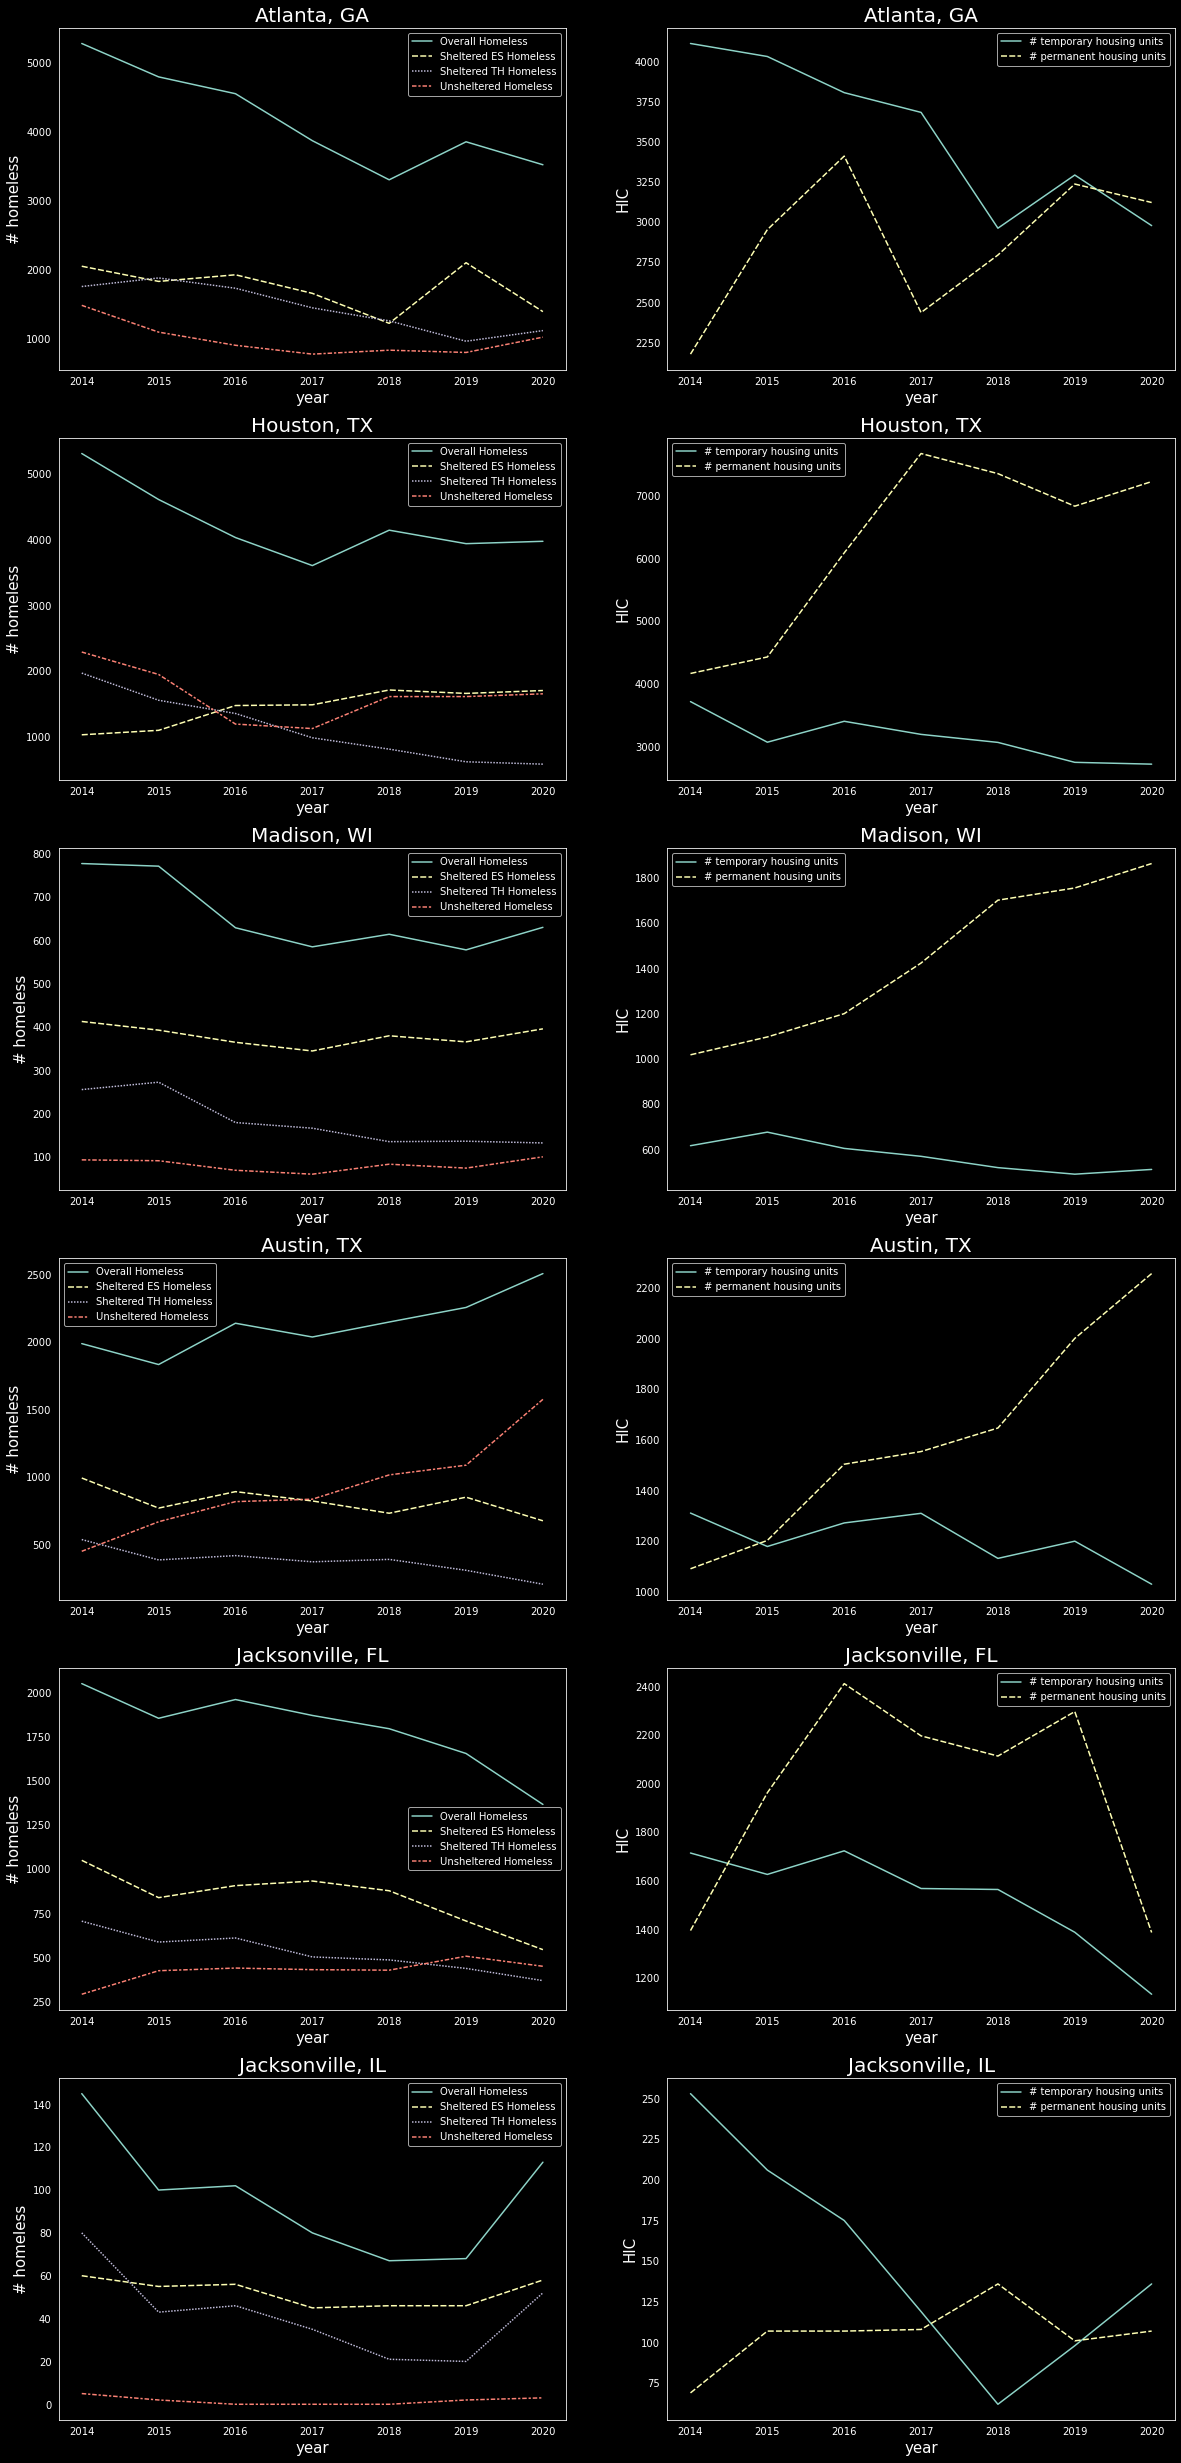

In [252]:
#change in homeless numbers between 2014 and 2020

cities = [('atlanta', 'ga'), ('houston', 'tx'), ('madison', 'wi'), ('austin', 'tx'), ('jacksonville', 'fl'), ('jacksonville', 'il')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,44));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]
    sns.lineplot(ax = axes[i][0], data = city_data.groupby('year').sum())
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    
    sns.lineplot(ax = axes[i][1], data = city_HIC_data.groupby('year').sum());
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC')
    

In [140]:
city_HIC_data

,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (RRH),Total Year-Round Beds (PSH),Total Year-Round Beds (OPH)
98,3747.0,149.0,1677.0,0.0
100,365.0,16.0,336.0,0.0
513,3609.0,197.0,2247.0,0.0
515,422.0,0.0,509.0,0.0
919,3384.0,519.0,2325.0,0.0
921,422.0,0.0,567.0,0.0
1322,3419.0,177.0,1941.0,0.0
1324,264.0,15.0,299.0,5.0
1722,2821.0,652.0,1898.0,0.0
1724,141.0,15.0,230.0,0.0


In [179]:
# data_2[data_2['City'] == 'sacramento']
# data[data['City'] == 'sacramento']
data_2[data_2['City'] == 'tulsa']

#Dallas not in our data

,CoC Number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Dedicated Veteran Beds (RRH),Dedicated Youth Beds (RRH),Dedicated Veteran Beds (PSH),Dedicated Youth Beds (PSH),Dedicated Chronically Homeless Beds (PSH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH),CoC Name,City,State
313,OK-500,235.0,124.0,91.0,0.3872,127.0,108.0,0.0,50.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Central Oklahoma CoC,tulsa,ok
314,OK-501,874.0,740.0,709.0,0.8112,528.0,296.0,50.0,91.0,328.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tulsa City & County CoC,tulsa,ok
723,OK-500,245.0,134.0,95.0,0.3878,130.0,115.0,0.0,51.0,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Central Oklahoma CoC,tulsa,ok
724,OK-501,826.0,692.0,664.0,0.8039,533.0,268.0,25.0,91.0,328.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tulsa City & County CoC,tulsa,ok
1126,OK-500,208.0,118.0,74.0,0.3558,144.0,64.0,0.0,43.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Central Oklahoma CoC,tulsa,ok
1127,OK-501,818.0,684.0,656.0,0.802,525.0,268.0,25.0,91.0,328.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tulsa City & County CoC,tulsa,ok
1527,OK-500,213.0,121.0,77.0,0.3615,140.0,73.0,0.0,43.0,128.0,...,8.0,3.0,15.0,0.0,5.0,0.0,0.0,North Central Oklahoma CoC,tulsa,ok
1528,OK-501,848.0,714.0,666.0,0.7854,525.0,298.0,25.0,91.0,328.0,...,27.0,7.0,205.0,2.0,225.0,0.0,0.0,Tulsa City & County CoC,tulsa,ok
1926,OK-500,208.0,114.0,70.0,0.3365,143.0,65.0,0.0,36.0,118.0,...,9.0,4.0,15.0,0.0,10.0,0.0,0.0,North Central Oklahoma CoC,tulsa,ok
1927,OK-501,727.0,593.0,548.0,0.7538,479.0,223.0,25.0,88.0,241.0,...,38.0,7.0,302.0,2.0,224.0,0.0,0.0,Tulsa City & County CoC,tulsa,ok


<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Sacramento, CA')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Sacramento, CA')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Tulsa, OK')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Tulsa, OK')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'San diego, CA')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'San diego, CA')

Text(0, 0.5, 'HIC')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'San antonio, TX')

Text(0, 0.5, '# homeless')

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'San antonio, TX')

Text(0, 0.5, 'HIC')

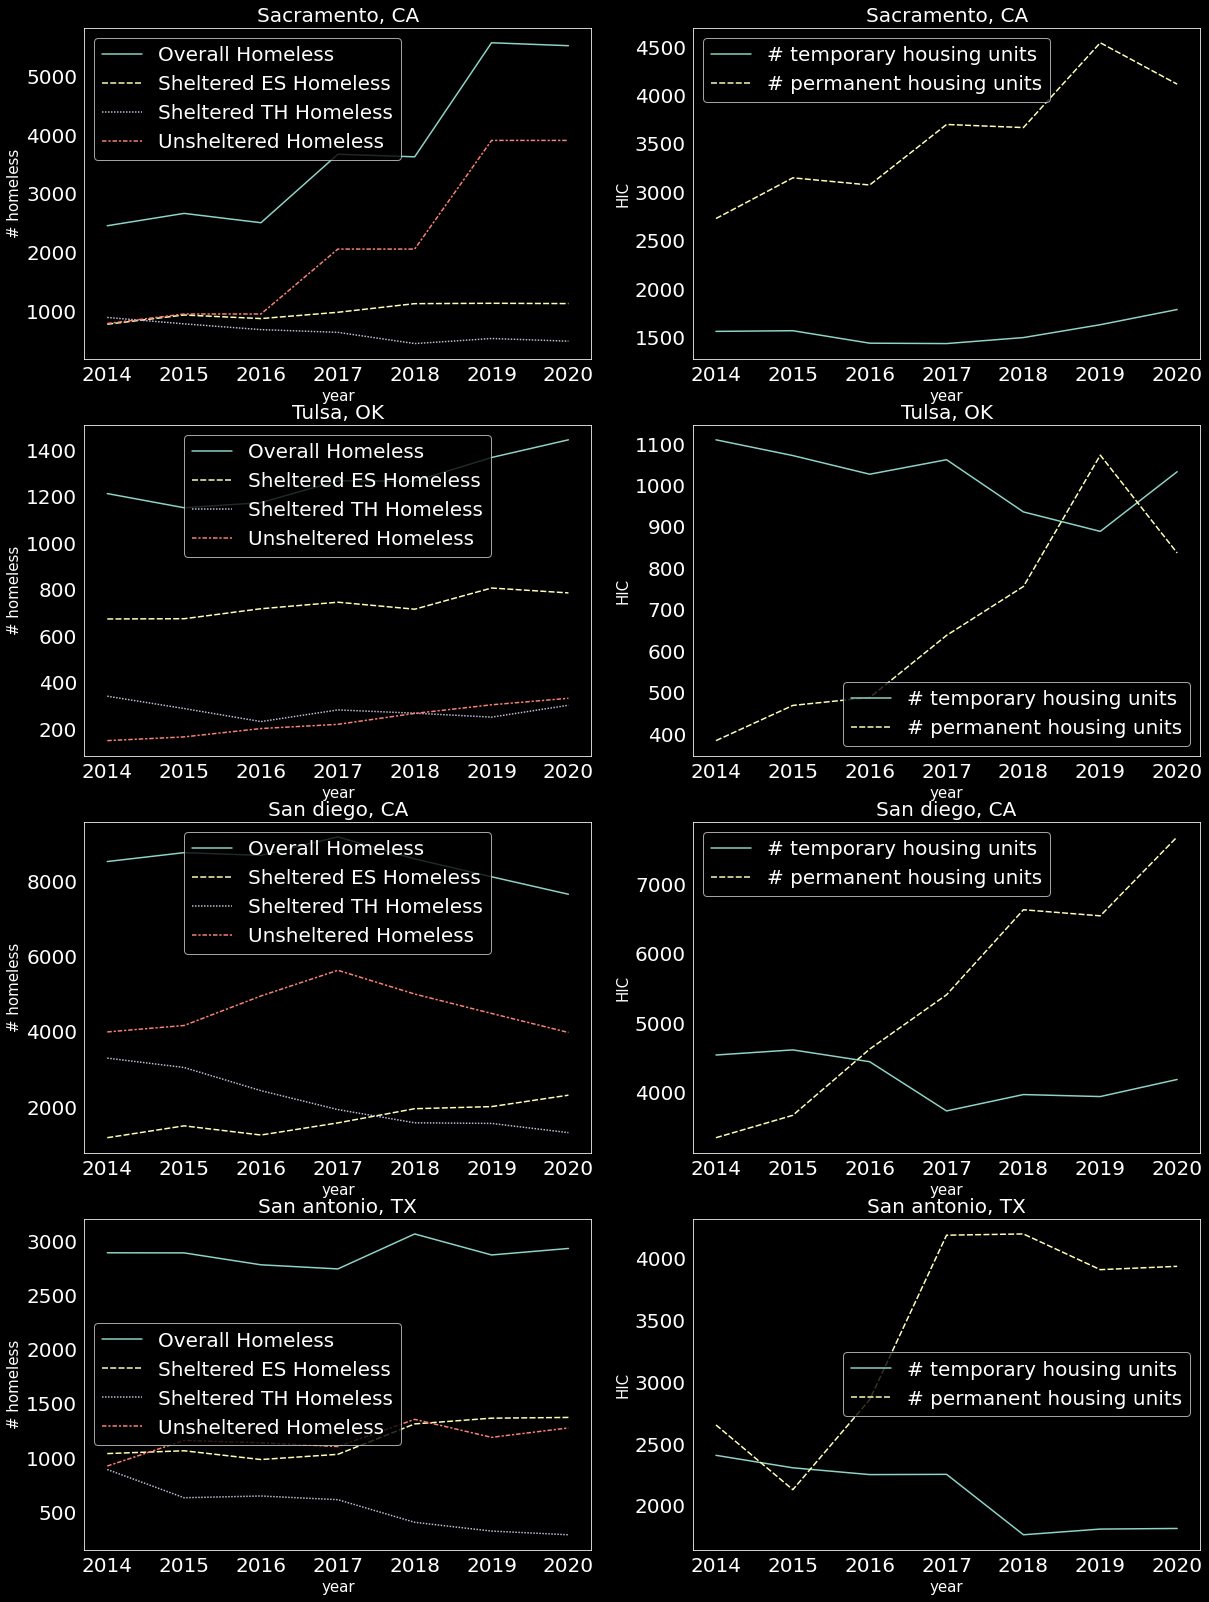

In [248]:
cities = [('sacramento', 'ca'), ('tulsa', 'ok'), ('san diego', 'ca'), ('san antonio', 'tx')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,28));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    

    sns.lineplot(data=city_data.groupby('year').sum(),ax = axes[i][0])
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')
   
    sns.lineplot(data=city_HIC_data.groupby('year').sum(),ax = axes[i][1])
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC');

    
plt.show()

### Normalizing homeless counts by population of cities

Text(0.5, 1.0, 'sacramento, CA')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'sacramento, CA')

Text(0, 0.5, 'HIC')

Text(0.5, 1.0, 'tulsa, OK')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'tulsa, OK')

Text(0, 0.5, 'HIC')

Text(0.5, 1.0, 'san diego, CA')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'san diego, CA')

Text(0, 0.5, 'HIC')

Text(0.5, 1.0, 'san antonio, TX')

Text(0, 0.5, '# homeless')

Text(0.5, 1.0, 'san antonio, TX')

Text(0, 0.5, 'HIC')

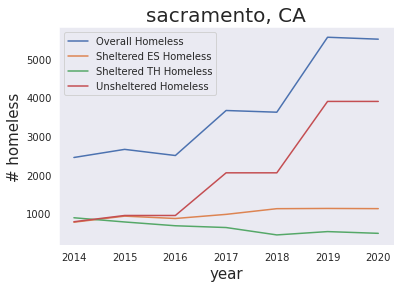

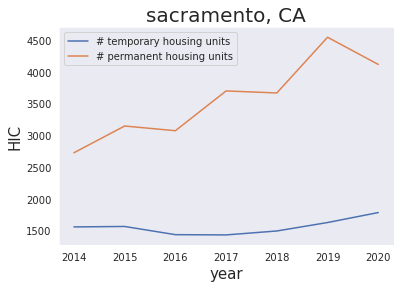

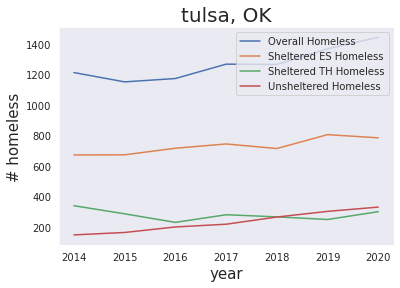

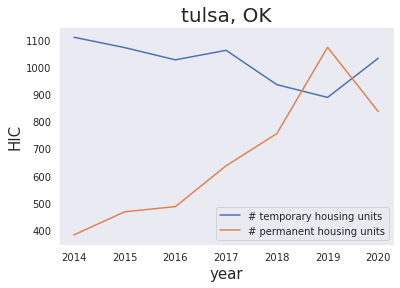

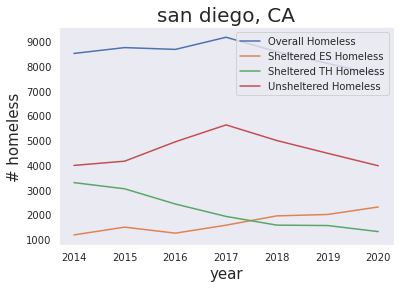

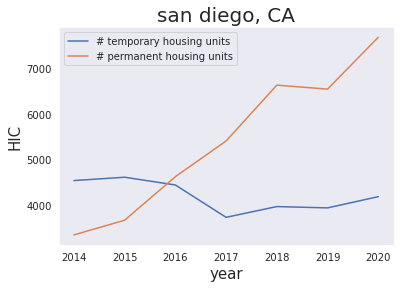

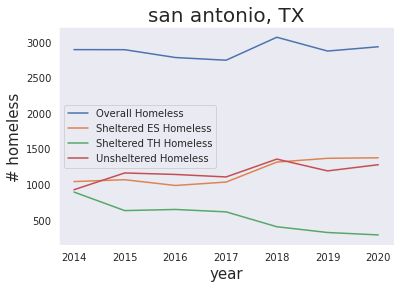

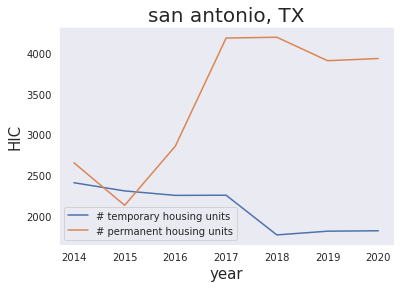

In [191]:
cities = [('sacramento', 'ca'), ('tulsa', 'ok'), ('san diego', 'ca'), ('san antonio', 'tx')];
fig, axes = plt.subplots(len(cities),2,figsize = (15,25));
plt.close()

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]
    axes[i][0] = city_data.groupby('year').sum().plot()
    axes[i][0].set_title(f'{city}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless');

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    
    axes[i][1] = city_HIC_data.groupby('year').sum().plot();
    axes[i][1].set_title(f'{city}, {state.upper()}');
    axes[i][1].set_ylabel('HIC');
    

    

In [253]:
#import population info

other_data = pd.read_csv('~/GA/Project5/Project5/data/weather-population/city_data.csv')

In [254]:
other_data.head()
other_data.shape

,city,Jan,April,July,Oct,Precip “,precip days,snowfall,rank,usps,...,Growth / Decline,Rank_y,Population (2013),Budget,Mayor,Took office,Term ends,Government type,City elections in 2021?,Mayoral election in 2021?
0,Albany,22.2,46.6,71.1,49.3,38.60,136,64.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albuquerque,35.7,55.6,78.5,57.3,9.47,60,11,32.0,NM,...,9565.0,32.0,556495.0,"$893,000,000",Tim Keller (D),2017.0,2022.0,Strong mayor,Yes,Yes
2,Anchorage,15.8,36.3,58.4,34.1,16.08,115,70.8,74.0,AK,...,NaN,62.0,300950.0,"$471,000,000",David Bronson (R),2021.0,2024.0,Hybrid,Yes,Yes
3,Asheville,35.8,54.1,73.0,55.2,47.07,126,15.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlanta,42.7,61.6,80.0,62.8,50.20,115,2.1,37.0,GA,...,23772.0,40.0,447841.0,"$533,000,000",Keisha Bottoms (D),2018.0,2022.0,Strong mayor,Yes,Yes


(103, 27)

In [294]:
#Creating a dictionary of state names and their abbreviations

state_abbr = pd.read_csv('../state_abbr.csv', index_col=0)
state_abbr = state_abbr.set_index('State_name')
state_abbr_dict = state_abbr.to_dict(orient='dict')['State_abbr']

In [321]:
population = pd.read_excel('../Population.xlsx', header = 1)
population.head()
population = population.drop(columns = ['Rank'])

#renaming population columns
population = population.rename(columns = {i:f'population_{i}' for i in range(2010,2020)})

#Add State column

population['State'] = population['Geographic Area'].map(lambda x: (state_abbr_dict[x.split(',')[1].strip()]).lower())


#adding a city column
population['City'] = population['Geographic Area'].map(lambda x: x.split(' city')[0].lower())

population.head()

,Rank,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York",8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817
1,2,"Los Angeles city, California",3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576
2,3,"Chicago city, Illinois",2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976
3,4,"Houston city, Texas",2100280,2126032,2161593,2199391,2241826,2286908,2309544,2316750,2318573,2320268
4,5,"Phoenix city, Arizona",1449038,1469796,1499274,1526491,1555445,1583690,1612199,1633560,1654675,1680992


,Geographic Area,population_2010,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,State,City
0,"New York city, New York",8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,ny,new york
1,"Los Angeles city, California",3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,ca,los angeles
2,"Chicago city, Illinois",2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,il,chicago
3,"Houston city, Texas",2100280,2126032,2161593,2199391,2241826,2286908,2309544,2316750,2318573,2320268,tx,houston
4,"Phoenix city, Arizona",1449038,1469796,1499274,1526491,1555445,1583690,1612199,1633560,1654675,1680992,az,phoenix


In [320]:
# merging PIT data with population data

data.head()

,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,491.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al
